In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
file_path = '/home/mehul/Documents/training/python/data/daily-min-temperatures.csv'

In [51]:
df = pd.read_csv(file_path, parse_dates=['Date'], index_col=0)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


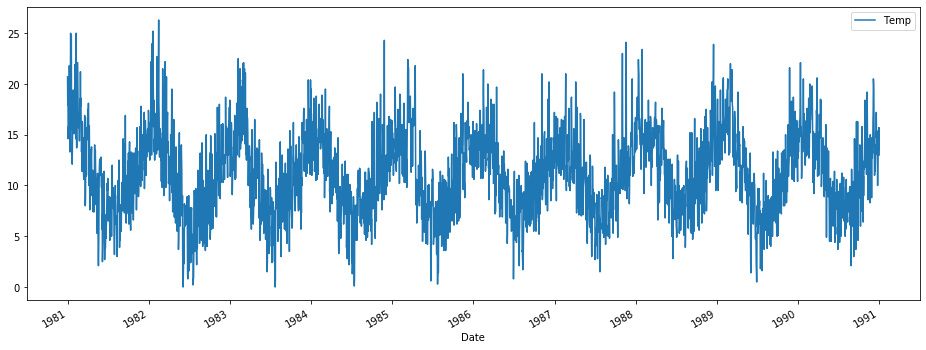

In [52]:
df.plot(figsize=(16,6))
plt.show()

# check for stationarity

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
adfuller(df)

(-4.44480492461168,
 0.0002470826300361191,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


# AR(p) - p is decided by PACF

In [57]:
from pandas.plotting import lag_plot

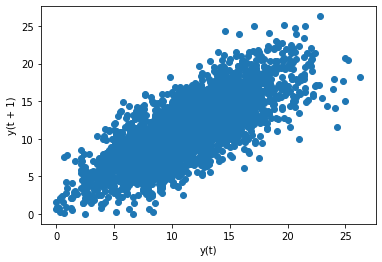

In [58]:
lag_plot(df)

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf

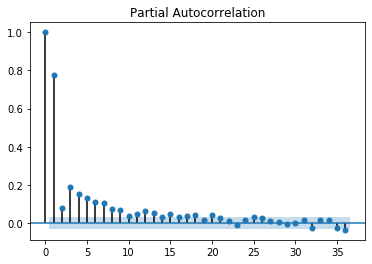

In [60]:
plot_pacf(df)
plt.show()

# above, lag=1 has a significantly high auto correlation with the value at t
# p in the AR model will be 1

In [61]:
x = df.values.ravel()
x

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [62]:
partition = round(0.70 * len(x))
train, test = x[:partition], x[partition:]

In [63]:
print(train)
print(test)

[20.7 17.9 18.8 ... 14.3 13.3 16.7]
[15.3 14.3 13.5 ... 13.5 15.7 13. ]


In [64]:
from statsmodels.tsa.ar_model import AutoReg

In [65]:
model = AutoReg(train, lags=1)

In [66]:
model_fit = model.fit()

In [67]:
prediction_list = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [68]:
prediction_list

array([15.35906008, 14.33209629, 13.54559229, ..., 10.97306839,
       10.97306839, 10.97306839])

In [69]:
test

array([15.3, 14.3, 13.5, ..., 13.5, 15.7, 13. ])

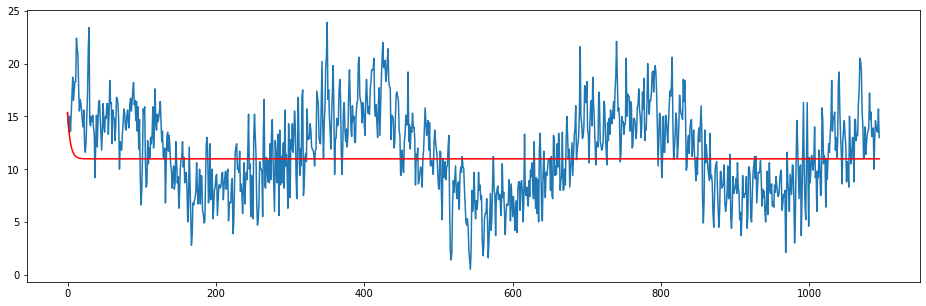

In [70]:
plt.figure(figsize=(16,5))
plt.plot(test)
plt.plot(prediction_list, color='red')
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
from numpy import sqrt

In [73]:
sqrt(mean_squared_error(test, prediction_list))

4.036104438765534

In [74]:
len(prediction_list)

1095

In [75]:
len(test)

1095

In [80]:
history = [x for x in train]
predictions = []
history

[20.7,
 17.9,
 18.8,
 14.6,
 15.8,
 15.8,
 15.8,
 17.4,
 21.8,
 20.0,
 16.2,
 13.3,
 16.7,
 21.5,
 25.0,
 20.7,
 20.6,
 24.8,
 17.7,
 15.5,
 18.2,
 12.1,
 14.4,
 16.0,
 16.5,
 18.7,
 19.4,
 17.2,
 15.5,
 15.1,
 15.4,
 15.3,
 18.8,
 21.9,
 19.9,
 16.6,
 16.8,
 14.6,
 17.1,
 25.0,
 15.0,
 13.7,
 13.9,
 18.3,
 22.0,
 22.1,
 21.2,
 18.4,
 16.6,
 16.1,
 15.7,
 16.6,
 16.5,
 14.4,
 14.4,
 18.5,
 16.9,
 17.5,
 21.2,
 17.8,
 18.6,
 17.0,
 16.0,
 13.3,
 14.3,
 11.4,
 16.3,
 16.1,
 11.8,
 12.2,
 14.7,
 11.8,
 11.3,
 10.6,
 11.7,
 14.2,
 11.2,
 16.9,
 16.7,
 8.1,
 8.0,
 8.8,
 13.4,
 10.9,
 13.4,
 11.0,
 15.0,
 15.7,
 14.5,
 15.8,
 16.7,
 16.8,
 17.5,
 17.1,
 18.1,
 16.6,
 10.0,
 14.9,
 15.9,
 13.0,
 7.6,
 11.5,
 13.5,
 13.0,
 13.3,
 12.1,
 12.4,
 13.2,
 13.8,
 10.6,
 9.0,
 10.0,
 9.8,
 11.5,
 8.9,
 7.4,
 9.9,
 9.3,
 9.9,
 7.4,
 8.6,
 11.9,
 14.0,
 8.6,
 10.0,
 13.5,
 12.0,
 10.5,
 10.7,
 8.1,
 10.1,
 10.6,
 5.3,
 6.6,
 8.5,
 11.2,
 9.8,
 5.9,
 3.2,
 2.1,
 3.4,
 5.4,
 9.6,
 11.5,
 12.3,
 12.6,
 11

In [81]:
for i in range(len(test)):
    model = AutoReg(history, lags=1)
    model_fit = model.fit()
    prediction_list = model_fit.predict(start=len(history), end=len(history))
    predictions.append(prediction_list[0])
    history.append(test[i])
    print('Predicted {0}'.format(prediction_list[0]))
    print('Expected {0}'.format(test[i]))

Predicted 15.359060076787436
Expected 15.3
Predicted 14.286807651479965
Expected 14.3
Predicted 13.52097145475269
Expected 13.5
Predicted 12.908281472487932
Expected 15.0
Predicted 14.058361315402342
Expected 13.6
Predicted 12.985713879174357
Expected 15.2
Predicted 14.212629155363452
Expected 17.0
Predicted 15.594275368220144
Expected 18.7
Predicted 16.901615841335985
Expected 16.5
Predicted 15.21416610926305
Expected 17.4
Predicted 15.906842099663006
Expected 18.3
Predicted 16.600659507070983
Expected 18.3
Predicted 16.603426056906997
Expected 22.4
Predicted 19.76413246175909
Expected 21.4
Predicted 19.00064633467732
Expected 20.9
Predicted 18.621371520895472
Expected 17.6
Predicted 16.080115426535407
Expected 15.5
Predicted 14.464048923882137
Expected 16.6
Predicted 15.312196988345763
Expected 16.2
Predicted 15.005374045804121
Expected 15.6
Predicted 14.544224417361322
Expected 14.5
Predicted 13.697656038087338
Expected 14.0
Predicted 13.313058626896098
Expected 15.6
Predicted 14.54

Predicted 9.159722486598298
Expected 7.7
Predicted 8.464395069614302
Expected 5.8
Predicted 6.996017848006438
Expected 8.7
Predicted 9.235841518204927
Expected 10.6
Predicted 10.702766374109926
Expected 6.7
Predicted 7.6914422025677895
Expected 8.8
Predicted 9.312775318846604
Expected 9.7
Predicted 10.007431866695942
Expected 9.0
Predicted 9.466863226086296
Expected 11.8
Predicted 11.628293478794099
Expected 15.2
Predicted 14.253126124150967
Expected 10.0
Predicted 10.239575277209703
Expected 10.5
Predicted 10.625293458930777
Expected 5.5
Predicted 6.766930117272747
Expected 9.4
Predicted 9.776461717274861
Expected 8.8
Predicted 9.31344360300915
Expected 5.3
Predicted 6.6123202043380775
Expected 13.0
Predicted 12.551417622987715
Expected 15.2
Predicted 14.247753718512758
Expected 13.2
Predicted 12.706110271059327
Expected 11.5
Predicted 11.39590439615447
Expected 6.8
Predicted 7.773633937232391
Expected 4.7
Predicted 6.153032448852226
Expected 5.2
Predicted 6.537245266483009
Expected 6

Predicted 16.66904583139672
Expected 18.9
Predicted 17.134199958624226
Expected 20.3
Predicted 18.21806575618616
Expected 21.4
Predicted 19.072827963866516
Expected 18.3
Predicted 16.68027843292935
Expected 17.8
Predicted 16.296086760710615
Expected 17.7
Predicted 16.22060253459847
Expected 12.8
Predicted 12.438253980790366
Expected 15.1
Predicted 14.212985606963631
Expected 15.0
Predicted 14.136357245324133
Expected 14.8
Predicted 13.982507099114105
Expected 12.0
Predicted 11.822129439409387
Expected 12.5
Predicted 12.2079432897802
Expected 15.0
Predicted 14.1370361511295
Expected 17.1
Predicted 15.758896790995465
Expected 17.3
Predicted 15.914780958644918
Expected 16.9
Predicted 15.60712446513584
Expected 16.5
Predicted 15.299247146116038
Expected 13.6
Predicted 13.059916357787031
Expected 13.2
Predicted 12.751308067745912
Expected 9.4
Predicted 9.81806335833863
Expected 9.5
Predicted 9.895091989806524
Expected 11.8
Predicted 11.670273204846264
Expected 10.4
Predicted 10.589772692198

Predicted 9.697768254795967
Expected 13.5
Predicted 12.951925640218409
Expected 8.0
Predicted 8.691510046650281
Expected 8.1
Predicted 8.768650885769638
Expected 10.0
Predicted 10.240233918968897
Expected 8.5
Predicted 9.078289681082925
Expected 12.5
Predicted 12.176098573164325
Expected 15.0
Predicted 14.112469654015754
Expected 13.3
Predicted 12.796021756809537
Expected 11.0
Predicted 11.015046988010859
Expected 11.9
Predicted 11.711941542162307
Expected 8.3
Predicted 8.924547016102906
Expected 9.7
Predicted 10.008401438700954
Expected 11.3
Predicted 11.247084030334266
Expected 12.5
Predicted 12.176157050482697
Expected 9.4
Predicted 9.77631936645561
Expected 11.4
Predicted 11.324467098517907
Expected 13.2
Predicted 12.717875479476458
Expected 13.8
Predicted 13.1825998040268
Expected 16.0
Predicted 14.88659935483202
Expected 10.9
Predicted 10.938160127866109
Expected 11.9
Predicted 11.71206853129195
Expected 12.4
Predicted 12.099099884340669
Expected 13.2
Predicted 12.718393010944459

Predicted 8.480081276133241
Expected 10.6
Predicted 10.734939898894615
Expected 8.2
Predicted 8.868917150924439
Expected 7.9
Predicted 8.635310901684566
Expected 5.2
Predicted 6.534569559896573
Expected 5.9
Predicted 7.07824775549478
Expected 3.7
Predicted 5.364431769172146
Expected 5.6
Predicted 6.8425248796562395
Expected 9.4
Predicted 9.799302294691364
Expected 7.4
Predicted 8.243243405697402
Expected 7.3
Predicted 8.164968745929777
Expected 7.7
Predicted 8.47579635018001
Expected 7.7
Predicted 8.475409074709232
Expected 9.3
Predicted 9.7201498429663
Expected 4.4
Predicted 5.906675801191119
Expected 5.7
Predicted 6.917727212664349
Expected 10.2
Predicted 10.419548778807933
Expected 10.2
Predicted 10.419481815936514
Expected 9.3
Predicted 9.71928486427152
Expected 5.4
Predicted 6.684519345110155
Expected 5.0
Predicted 6.371895200966004
Expected 7.6
Predicted 8.395321958516611
Expected 9.6
Predicted 9.951376300995856
Expected 10.4
Predicted 10.573691620370834
Expected 11.2
Predicted 1

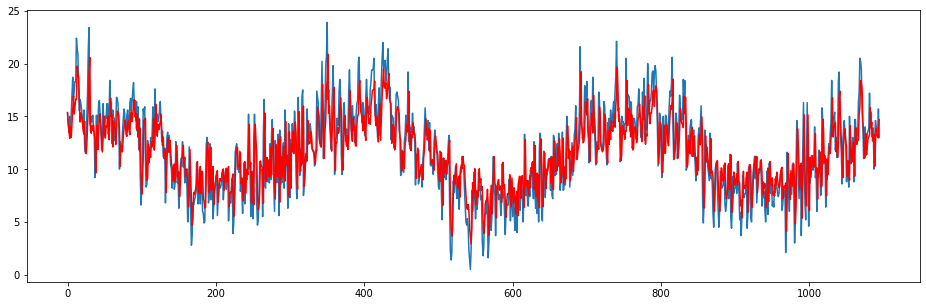

In [82]:
plt.figure(figsize=(16,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [83]:
sqrt(mean_squared_error(test, predictions))

2.447956410732567